In [1]:
import pandas as pd
from config import DATA_TRAIN_CSV
from config import DATA_LABEL_DESCRIPTIONS
import json

2020-05-03 21:06:53,827 : INFO : Checking/creating directories...
2020-05-03 21:06:53,828 : INFO : Directories are set.


In [2]:
df = pd.read_csv(DATA_TRAIN_CSV)

In [3]:
df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


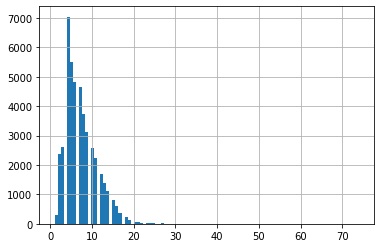

In [4]:
df.groupby(['ImageId']).count().ClassId.hist(bins=100)

In [5]:
with open(DATA_LABEL_DESCRIPTIONS, 'r') as f:
    labels_dict = json.load(f)
    df_desc = pd.DataFrame(labels_dict['categories'])

In [6]:
df_desc.head()

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2


In [7]:
len(df.ImageId.unique())

45623

In [8]:
df_desc.supercategory.unique()

array(['upperbody', 'lowerbody', 'wholebody', 'head', 'neck',
       'arms and hands', 'waist', 'legs and feet', 'others',
       'garment parts', 'closures', 'decorations'], dtype=object)

In [9]:
df_desc.supercategory.unique()

array(['upperbody', 'lowerbody', 'wholebody', 'head', 'neck',
       'arms and hands', 'waist', 'legs and feet', 'others',
       'garment parts', 'closures', 'decorations'], dtype=object)

In [10]:
df_desc.loc[df_desc.supercategory == 'garment parts']

,id,name,supercategory,level
27,27,hood,garment parts,2
28,28,collar,garment parts,2
29,29,lapel,garment parts,2
30,30,epaulette,garment parts,2
31,31,sleeve,garment parts,2
32,32,pocket,garment parts,2
33,33,neckline,garment parts,2


In [11]:
df_desc.loc[df_desc.supercategory == 'closures']

,id,name,supercategory,level
34,34,buckle,closures,2
35,35,zipper,closures,2


In [12]:
df_desc.loc[df_desc.supercategory == 'others']

,id,name,supercategory,level
24,24,"bag, wallet",others,2
25,25,scarf,others,2
26,26,umbrella,others,2


In [13]:
df_desc.level.unique()

array([2])

In [14]:
df_desc.loc[df_desc.supercategory == 'wholebody']

,id,name,supercategory,level
9,9,coat,wholebody,2
10,10,dress,wholebody,2
11,11,jumpsuit,wholebody,2
12,12,cape,wholebody,2


In [15]:
df_desc.loc[df_desc.supercategory == 'arms and hands']

,id,name,supercategory,level
17,17,glove,arms and hands,2
18,18,watch,arms and hands,2


In [ ]:
import pandas as pd
from config import DATA_TRAIN_CSV
from config import DATA_TRAIN_FOLDER
import imgaug.augmenters as iaa
from data.fashion_data_set import FashionDataset
transforms = iaa.Sequential([
    iaa.Resize(256),
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5)
])
ds = FashionDataset(df, DATA_TRAIN_FOLDER, transforms)

In [ ]:
image, mask, boxes = ds.__getitem__(0)

In [ ]:
image, mask, boxes = ds.__getitem__(0)

In [ ]:
image, mask, boxes = ds.__getitem__(0)

In [18]:
image, mask, boxes = ds.__getitem__(0)